## Chi-square

Compute chi-squared test between categorical features and classification target.

$$X^2 = \sum_{}^{}\frac{(observed — expected)^2}{expected}$$

In [1]:
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
# eating habits

obs = np.array([30, 2, 10, 10, 30, 15]).reshape([2,3])
obs

array([[30,  2, 10],
       [10, 30, 15]])

In [3]:
chi2_contingency(obs)

(34.37516233766234,
 3.431850345739465e-08,
 2,
 array([[17.31958763, 13.8556701 , 10.82474227],
        [22.68041237, 18.1443299 , 14.17525773]]))

In [4]:
# dressing habits

obs = np.array([3, 2, 5, 4, 1, 6]).reshape([2,3])
obs

array([[3, 2, 5],
       [4, 1, 6]])

In [5]:
chi2_contingency(obs)

(0.5206611570247934,
 0.7707967348437967,
 2,
 array([[3.33333333, 1.42857143, 5.23809524],
        [3.66666667, 1.57142857, 5.76190476]]))

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [7]:
# load titanic dataset

variables = ['pclass', 'survived', 'sex', 'sibsp', 'parch', 'embarked']

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl',
                   usecols=variables,
                   na_values='?',
                   )

data.dropna(subset=['embarked'], inplace=True)
data.head()

,pclass,survived,sex,sibsp,parch,embarked
0,1,1,female,0,0,S
1,1,1,male,1,2,S
2,1,0,female,1,2,S
3,1,0,male,1,2,S
4,1,0,female,1,2,S


In [8]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("survived", axis=1),
    data['survived'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((914, 5), (393, 5))

In [9]:
# contingency table for gender

c = pd.crosstab(y_train, X_train['sex'])

c

sex,female,male
survived,,
0,89,483
1,230,112


In [10]:
chi2_contingency(c)

(249.44419858265127,
 3.432495124524887e-56,
 1,
 array([[199.63676149, 372.36323851],
        [119.36323851, 222.63676149]]))

In [11]:
# To rank all features

chi_ls = []

for feature in X_train.columns:
    
    # create contingency table
    c = pd.crosstab(y_train, X_train[feature])
    
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

Text(0.5, 1.0, 'Feature importance based on chi-square test')

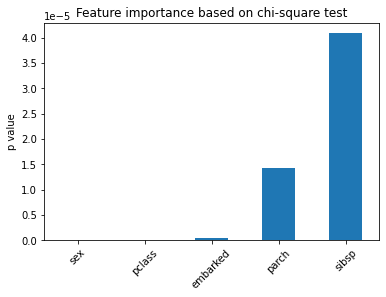

In [12]:
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

In [13]:
# select top 3

selected = pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True)[0:3].index

selected

Index(['sex', 'pclass', 'embarked'], dtype='object')

In [14]:
# reduce data to selected features

X_train = X_train[selected]
X_test = X_test[selected]

X_train.head()

,sex,pclass,embarked
868,male,3,S
429,male,2,S
480,male,2,C
1308,male,3,S
455,male,2,S
